<a href="https://colab.research.google.com/github/ykitaguchi77/YOLOv5/blob/main/YOLOv5_helmet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ヘルメット画像の検出
#https://qiita.com/DS27/items/6ae8c49569c1a55a0255

import torch
from IPython.display import Image, clear_output
import os
import shutil

!git clone https://github.com/ultralytics/yolov5
os.chdir("/content/yolov5")
%pip install -qr requirements.txt



clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

# Setup complete. Using torch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)

Setup complete. Using torch 1.12.1+cu113 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


detect: weights=['yolov5s.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-198-gacff977 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

100% 14.1M/14.1M [00:00<00:00, 295MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 17.7ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 13.3ms
Speed: 0.5ms pre-process, 15.5ms inference, 16.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


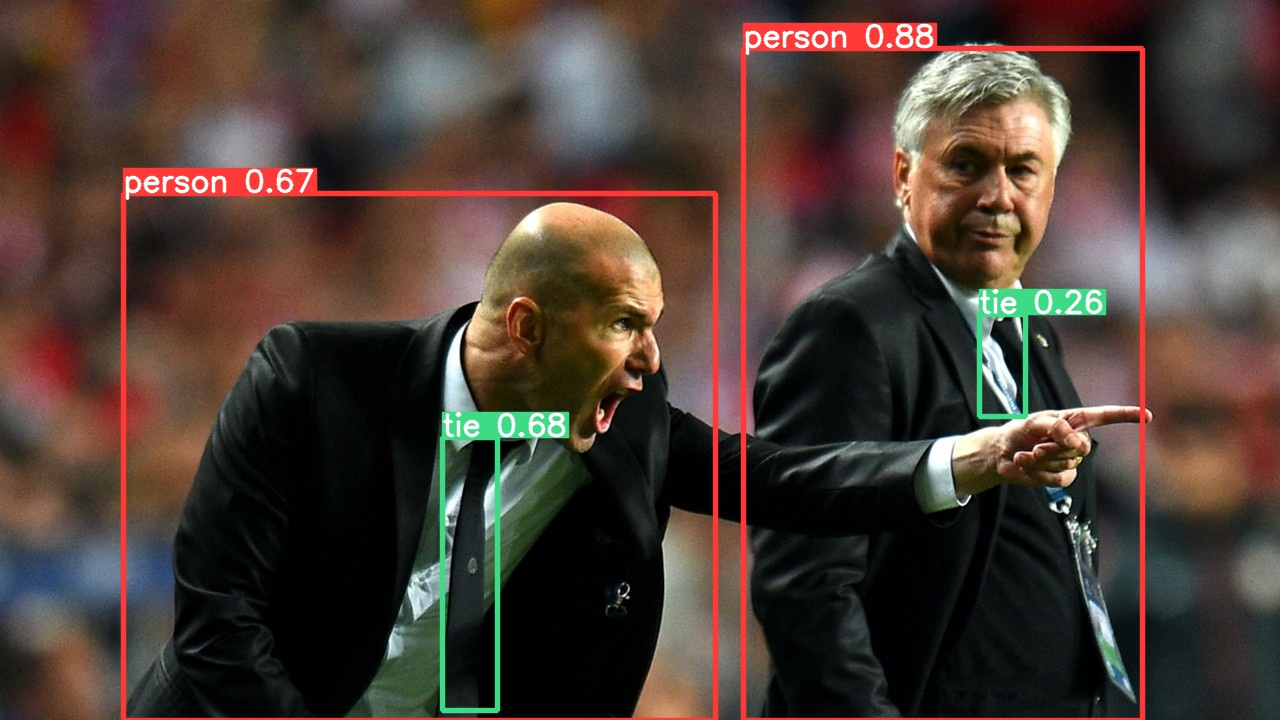

In [2]:
#動作確認
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/
Image(filename='runs/detect/exp/zidane.jpg', width=600)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Hard_Hat_Workers（オープンデータセット）をcontentsフォルダにコピーしてyolov5内に展開する
shutil.copy("/content/drive/MyDrive/Deep_learning/YOLOv5/Hard_Hat_Workers.v2-raw.yolov5pytorch.zip", "/content/Workers.zip")
!unzip /content/Workers.zip 
!rm /content/Workers.zip

!ls /content/yolov5

# Yamlファイルのパスを修正

In [4]:
#内容を確認
%cat data.yaml

train: ../train/images
val: ../valid/images

nc: 3
names: ['head', 'helmet', 'person']

In [5]:
# define number of classes based on YAML
# data.yaml contains the information about number of classes and their labels required for this project
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])
    print(num_classes)

3


In [6]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [7]:
# Below we are changing the data configuration for right path to the dataset
# yamlファイルの書き換え（パスの修正）
%%writetemplate /content/yolov5/data.yaml

train: ./train/images
val: ./test/images

nc: 3
names: ['head', 'helmet', 'person']

In [8]:
with open(r'data.yaml') as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    
    # yamlファイル全体の情報を取得
    labels_list = yaml.load(file, Loader=yaml.FullLoader)

    #yamlからラベル情報を抜き出し
    label_names = labels_list['names']

print("Number of Classes are {}, whose labels are {} for this Object Detection project".format(num_classes,label_names))

# Number of Classes are 3, whose labels are ['head', 'helmet', 'person'] for this Object Detection project
print("")
print(labels_list)
print(label_names)

Number of Classes are 3, whose labels are ['head', 'helmet', 'person'] for this Object Detection project

{'train': './train/images', 'val': './test/images', 'nc': 3, 'names': ['head', 'helmet', 'person']}
['head', 'helmet', 'person']


#yolo5s.yamlも修正する

In [9]:
# this is the model configuration we will use for our tutorial 
# yolov5s.yaml contains the configuration of neural network required for training.
# モデルの構成を確認
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [10]:
# Below we are changing the configuration so that it becomes compatible to number of classes required in this project
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes  # CHANGED HERE
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

#**モデルを学習**

In [ ]:
%%time
%cd /content/yolov5/

In [ ]:
!python train.py --help

In [ ]:
# 10epochごとにベストモデルを退避させる
!python train.py --img 416 --batch 80 --epochs 10 --data './data.yaml' --cfg ./models/custom_yolov5s.yaml --weights /content/yolov5/yolov5s.pt
shutil.copy("/content/yolov5/runs/train/exp/weights/best.pt", "/content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt")
print("10 epochs done!")

!python train.py --img 416 --batch 80 --resume --epochs 10 --data './data.yaml' --cfg ./models/custom_yolov5s.yaml --weights /content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt
shutil.copy("/content/yolov5/runs/train/exp/weights/best.pt", "/content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt")
print("20 epochs done!")

!python train.py --img 416 --batch 80 --resume --epochs 10 --data './data.yaml' --cfg ./models/custom_yolov5s.yaml --weights /content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt
shutil.copy("/content/yolov5/runs/train/exp/weights/best.pt", "/content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt")
print("30 epochs done!")

!python train.py --img 416 --batch 80 --resume --epochs 10 --data './data.yaml' --cfg ./models/custom_yolov5s.yaml --weights /content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt
shutil.copy("/content/yolov5/runs/train/exp/weights/best.pt", "/content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt")
print("40 epochs done!")

!python train.py --img 416 --batch 80 --resume --epochs 10 --data './data.yaml' --cfg ./models/custom_yolov5s.yaml --weights /content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt
shutil.copy("/content/yolov5/runs/train/exp/weights/best.pt", "/content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt")
print("50 epochs done!")

!python train.py --img 416 --batch 80 --resume --epochs 10 --data './data.yaml' --cfg ./models/custom_yolov5s.yaml --weights /content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt
shutil.copy("/content/yolov5/runs/train/exp/weights/best.pt", "/content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt")
print("60 epochs done!")

!python train.py --img 416 --batch 80 --resume --epochs 10 --data './data.yaml' --cfg ./models/custom_yolov5s.yaml --weights /content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt
shutil.copy("/content/yolov5/runs/train/exp/weights/best.pt", "/content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt")
print("70 epochs done!")

!python train.py --img 416 --batch 80 --resume --epochs 10 --data './data.yaml' --cfg ./models/custom_yolov5s.yaml --weights /content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt
shutil.copy("/content/yolov5/runs/train/exp/weights/best.pt", "/content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt")
print("80 epochs done!")

!python train.py --img 416 --batch 80 --resume --epochs 10 --data './data.yaml' --cfg ./models/custom_yolov5s.yaml --weights /content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt
shutil.copy("/content/yolov5/runs/train/exp/weights/best.pt", "/content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt")
print("90 epochs done!")

!python train.py --img 416 --batch 80 --resume --epochs 10 --data './data.yaml' --cfg ./models/custom_yolov5s.yaml --weights /content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt
shutil.copy("/content/yolov5/runs/train/exp/weights/best.pt", "/content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt")
print("100 epochs done!")


In [22]:
# train yolov5s on Aquarium object detection data for 100 epochs [aroung 1000 epochs for better training and result]
# NOTE: All the images are already pre-processed to 416 x 416 size.
# We will be training for 100 epoch (increase it for better result) with batch size of 80
# data.yaml also contains the information about location of Train and Validation Data. That's how you get the train data.
# the training also requires the configuration of neural network, which is in custom_yolov5s.yaml
# weights will be by-default stored at /content/yolov5/runs/exp2/weights/best.pt
# time its performance

%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 80 --epochs 100 --data './data.yaml' --cfg ./models/custom_yolov5s.yaml --weights /content/yolov5/yolov5s.pt

# ※3時間ぐらいかかる

/content
train: weights=, cfg=./models/custom_yolov5s.yaml, data=./data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=80, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-196-ge42c89d Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0

In [23]:
########################
# 一時フォルダに保存されたweightを退避させる
########################
shutil.copy("/content/yolov5/runs/train/exp/weights/best.pt", "/content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt")

'/content/drive/MyDrive/Deep_learning/YOLOv5/helmet.pt'

In [ ]:
#Tensorboardで結果を確認

# Start tensorboard
# Launch after you have started training to all the graphs needed for inspection
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir /content/yolov5/runs

GROUND TRUTH TRAINING DATA:


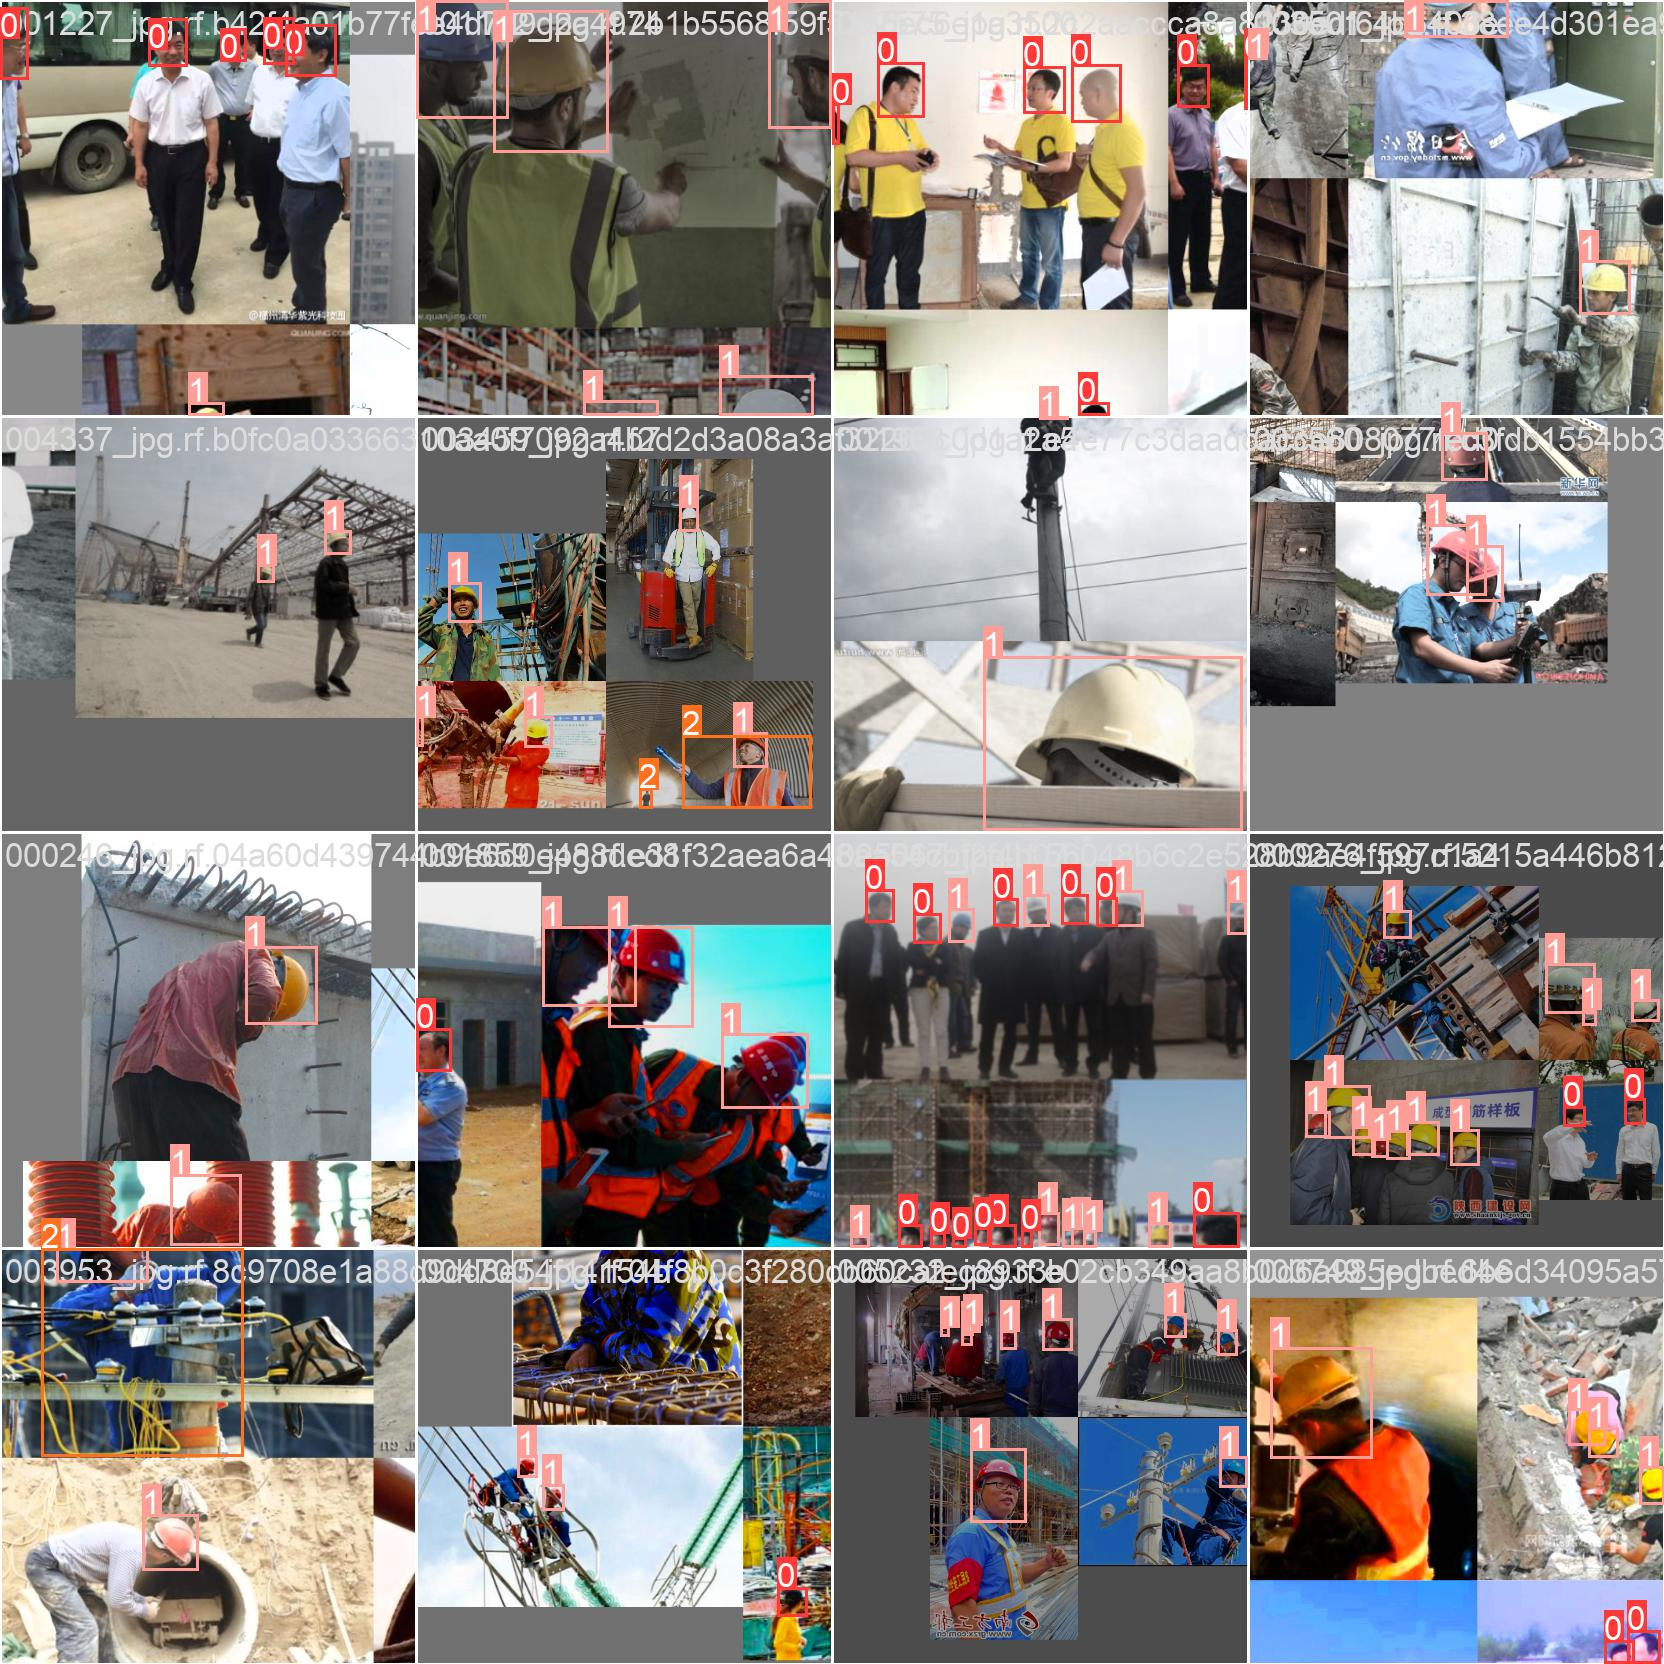

In [34]:
# 学習したデータを確認
# first, display our ground truth data
# The ground truth [Train data] is available in jpg file at location /content/yolov5/runs/train/exp2/test_batch0_labels.jpg 
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/exp/train_batch0.jpg', width=900)

In [36]:
!ls

benchmarks.py	 detect.py   __pycache__	  runs	     train.py
classify	 export.py   README.dataset.txt   segment    tutorial.ipynb
CONTRIBUTING.md  hubconf.py  README.md		  setup.cfg  utils
data		 LICENSE     README.roboflow.txt  test	     val.py
data.yaml	 models      requirements.txt	  train      yolov5s.pt


In [32]:
#テストデータに対する予測結果を確認
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

glob.glob('/content/yolov5/runs/detect/exp1/*')

[]

In [50]:
import os 
import shutil

test_folder_path = "/content/test_imgs"
num_testimg = 5

if os.path.exists(test_folder_path):
    shutil.rmtree(test_folder_path)
os.makedirs(test_folder_path)

for i in range(num_testimg):
    foldername = "/content/yolov5/test/images"
    basename = os.path.basename(os.listdir("/content/yolov5/test/images")[i])
    imgpath = os.path.join(foldername, basename)
    print(imgpath)
    shutil.copy(imgpath, test_folder_path)

glob.glob(test_folder_path)

/content/yolov5/test/images/005843_jpg.rf.b658ee3355fb3e58ac05579309916005.jpg
/content/yolov5/test/images/006978_jpg.rf.797c1b80e617141a9e41f6e6f8fb069d.jpg
/content/yolov5/test/images/006260_jpg.rf.db929f2e77b8010bee8262b97b05ba22.jpg
/content/yolov5/test/images/006228_jpg.rf.8d516350ac548ca7cbd9c3033bfa13a1.jpg
/content/yolov5/test/images/006030_jpg.rf.9d941d5566efa8625dfa80d2a78e7e12.jpg


['/content/test_imgs']

In [ ]:
# もともとのモデルによる判定
!python detect.py --source $test_folder_path --conf 0.5 --weights yolov5s.pt


In [54]:
# 新規モデルによる判定（１エポックでは全く検出されず...)
!python detect.py --source $test_folder_path --conf 0.5 --runs/train/exp/weights/best.pt


detect: weights=['runs/train/exp/weights/best.pt'], source=/content/test_imgs, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.01, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-196-ge42c89d Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7251912 parameters, 0 gradients
image 1/5 /content/test_imgs/005843_jpg.rf.b658ee3355fb3e58ac05579309916005.jpg: 448x640 (no detections), 16.5ms
image 2/5 /content/test_imgs/006030_jpg.rf.9d941d5566efa8625dfa80d2a78e7e12.jpg: 448x640 (no detections), 10.7ms
image 3/5 /content/test_imgs/006228_jpg.rf.8d516350ac548ca7cbd9c3033bfa13a1.jpg: 480x640 (no detections), 12.9ms
image 4/5 /c

In [ ]:
!python detect.py --source $test_folder_path --conf 0.5 --weights runs/train/exp/weights/best.pt

In [35]:
%cp /content/yolov5/runs/train/exp/weights/best.pt /content/drive/My\ Drive/YOLOv5
